## Get API array

In [3]:
import os
from Utils.read_coord import kml_coord
from Utils.sentinal_request import senti_api
from Utils.forest_cover import get_cover

file_path = input('Enter kml file path: ')
print(file_path)

if os.path.exists(file_path):
    print('The file exists')

    with open(file_path, 'r', encoding='utf-8-sig') as f:
        lines = f.readlines()

        #print(lines)
else:
    print('The specified file does NOT exist')
    
poly_coord = kml_coord(file_path)
print(poly_coord)

img,resol = senti_api(poly_coord)
print(resol)
#print(img)
# C:\Users\User\OneDrive - Engenuity (Pvt) Ltd\Github\SPE-testing\Test Data\gAMPOLA TEST SITE 2.kml

Enter kml file path: C:\Users\User\OneDrive - Engenuity (Pvt) Ltd\Github\SPE-testing\Test Data\gAMPOLA TEST SITE 2.kml
C:\Users\User\OneDrive - Engenuity (Pvt) Ltd\Github\SPE-testing\Test Data\gAMPOLA TEST SITE 2.kml
The file exists
[[80.54830488  7.09138959]
 [80.54862792  7.0908058 ]
 [80.54983642  7.09009562]
 [80.55092306  7.09024294]
 [80.55188896  7.09040945]
 [80.55227594  7.09060375]
 [80.55291793  7.09075515]
 [80.55346817  7.09067105]
 [80.55432141  7.09055437]
 [80.55468188  7.09055554]
 [80.55514106  7.09091272]
 [80.55538022  7.09175008]
 [80.55549106  7.09276935]
 [80.55517581  7.09363418]
 [80.55438863  7.09398713]
 [80.55357122  7.09426935]
 [80.55309183  7.09425854]
 [80.55259774  7.09410748]
 [80.55215408  7.09387411]
 [80.55163136  7.09373405]
 [80.55100531  7.09343574]
 [80.55023178  7.09319959]
 [80.55022909  7.09321476]
 [80.54910537  7.09293352]
 [80.54821586  7.0922228 ]
 [80.54830488  7.09138959]]
10


In [4]:
img.shape

(46, 80, 4)

In [5]:
red1 = img[:, :, 2]
red1.shape

(46, 80)

In [6]:
from Utils.vegetation_indices import normalized_diff

red = img[:, :, 2]
nir = img[:, :, 3]
ndvi1 = normalized_diff(nir,red)
ndvi1.shape

(46, 80)

## Read tiff file

In [7]:
import rioxarray as rxr

In [8]:
img_path = r'C:\Users\User\OneDrive - Engenuity (Pvt) Ltd\Github\SPE-testing\Data\79da53c7395caf9c07e77eb56e927722'
file_name = 'response.tiff'

# read the .tiff file
file = rxr.open_rasterio(img_path+'/'+file_name)

In [9]:
file.shape

(5, 46, 80)

In [10]:
red2 = file[2]
red2.shape

(46, 80)

In [11]:
red = file[2]
nir = file[3]
ndvi2 = normalized_diff(nir,red)
ndvi2.shape

(46, 80)

## Compare two arrays

In [12]:
import numpy as np

comparison = red1 == red2
equal_arrays = comparison.all()
 
print(equal_arrays)

<xarray.DataArray ()>
array(True)
Coordinates:
    band         int32 3
    spatial_ref  int32 0


In [13]:
np.array_equal(red1, red2)

True

## Plot array

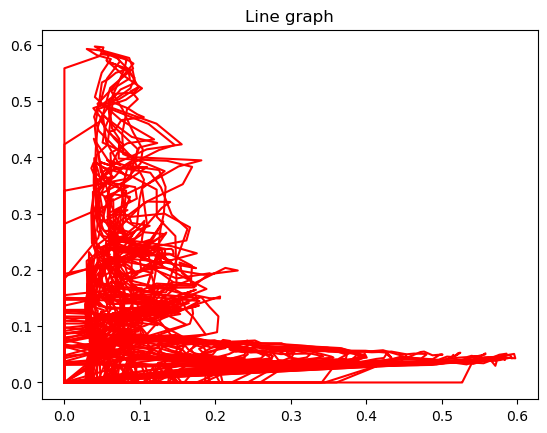

In [14]:
import matplotlib.pyplot as plt

x = red1
y = np.sort(x)

plt.title("Line graph")
plt.plot(x, y, color="red")

plt.show()

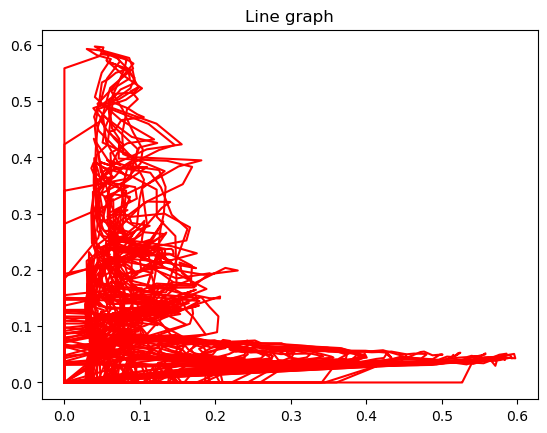

In [15]:
x = red2
y = np.sort(x)

plt.title("Line graph")
plt.plot(x, y, color="red")

plt.show()

## Compare NDVI

In [16]:
comparison = ndvi1 == ndvi2
equal_arrays = comparison.all()
 
print(equal_arrays)

True


## Plot NDVI

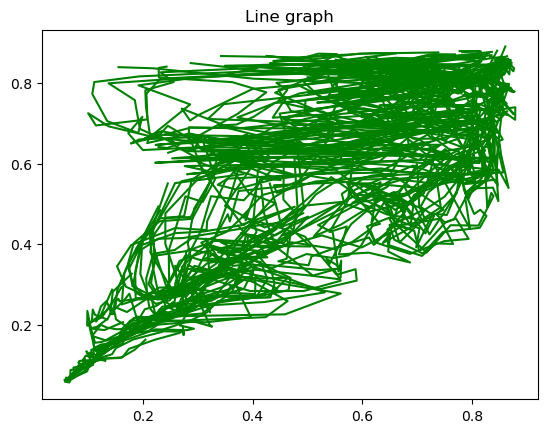

In [17]:
x = ndvi1
y = np.sort(x)

plt.title("Line graph")
plt.plot(x, y, color="g")

plt.show()

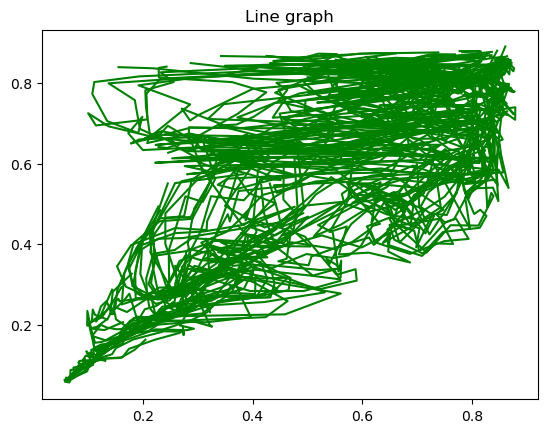

In [18]:
x = ndvi2
y = np.sort(x)

plt.title("Line graph")
plt.plot(x, y, color="g")

plt.show()